In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xlrd 

In [54]:
import pandas as pd
df = pd.read_excel (r"C:\Users\Kanak Nath\Downloads\wbdata.xls")
# update existing DataFrame directly to replace empty cells with zero
df.fillna(0, inplace=True)
print(df.head())


                  Country Name          1960          1961        1962  \
0                        Aruba  0.000000e+00  0.000000e+00         0.0   
1  Africa Eastern and Southern  0.000000e+00  0.000000e+00         0.0   
2                  Afghanistan  2.222223e+07  2.444446e+07  26666680.0   
3   Africa Western and Central  0.000000e+00  0.000000e+00         0.0   
4                       Angola  0.000000e+00  0.000000e+00         0.0   

           1963          1964         1965         1966         1967  \
0  0.000000e+00  0.000000e+00          0.0          0.0          0.0   
1  0.000000e+00  0.000000e+00          0.0          0.0          0.0   
2  6.888892e+07  7.111114e+07  113333340.0  120000000.0  113333340.0   
3  0.000000e+00  0.000000e+00          0.0          0.0          0.0   
4  0.000000e+00  0.000000e+00          0.0          0.0          0.0   

           1968  ...          2015          2016          2017          2018  \
0  0.000000e+00  ...  2.083567e+09  2.0577

In [102]:
# we just need to separate the columns into Features (X) and Target (y) directly from df

# create x (Features) by dropping the target column (assuming '2024' is the target)

# Drop the target column and any text-based columns to create the feature set
x = df.drop(columns=['2024', 'Country Name'])

# Create y (Target)
y = df[['2024']] # to convert a 1D series into a dataframe, we've added 2 '[]'
print(x.shape)
print(y.shape)


(266, 64)
(266, 1)


In [56]:
x.columns

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')

In [57]:
y.columns 

Index(['2024'], dtype='object')

In [61]:
x.isnull().sum()

1960    0
1961    0
1962    0
1963    0
1964    0
       ..
2019    0
2020    0
2021    0
2022    0
2023    0
Length: 64, dtype: int64

In [62]:
y.isnull().sum()

2024    0
dtype: int64

In [63]:
x.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,9.868964e+08,1.035677e+09,1.023285e+09,1.210109e+09,1.261907e+09,1.462105e+09,1.571955e+09,1.714878e+09,1.859511e+09,2.106688e+09,...,7.200016e+11,6.413674e+11,6.287530e+11,6.959347e+11,7.656586e+11,7.543468e+11,6.854028e+11,8.634207e+11,9.696889e+11,9.536020e+11
std,4.478345e+09,4.586616e+09,4.496137e+09,5.338216e+09,5.539972e+09,5.990646e+09,6.369554e+09,6.629540e+09,7.133209e+09,7.907585e+09,...,2.535361e+12,2.270597e+12,2.235460e+12,2.458845e+12,2.694491e+12,2.653301e+12,2.414330e+12,3.011959e+12,3.361207e+12,3.322482e+12
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.253235e+09,1.310217e+09,1.284879e+09,1.467652e+09,1.475838e+09,1.393627e+09,1.193510e+09,1.251638e+09,1.469644e+09,9.994084e+08
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.430243e+10,1.255540e+10,1.289597e+10,1.419657e+10,1.495853e+10,1.492818e+10,1.224534e+10,1.511343e+10,1.819120e+10,1.814744e+10
75%,2.068318e+07,3.037381e+07,3.940463e+07,4.713124e+07,5.541791e+07,1.167010e+08,1.523376e+08,1.740012e+08,2.110259e+08,2.393400e+08,...,2.435051e+11,2.076311e+11,1.999406e+11,2.283042e+11,2.516060e+11,2.471059e+11,2.105128e+11,2.829639e+11,3.292123e+11,3.142498e+11
max,3.897122e+10,4.010228e+10,3.959175e+10,4.663421e+10,4.784558e+10,5.145116e+10,5.443707e+10,5.591830e+10,5.972886e+10,6.553158e+10,...,2.385244e+13,2.127089e+13,2.087774e+13,2.299562e+13,2.521392e+13,2.480066e+13,2.245969e+13,2.811574e+13,3.158798e+13,3.111798e+13


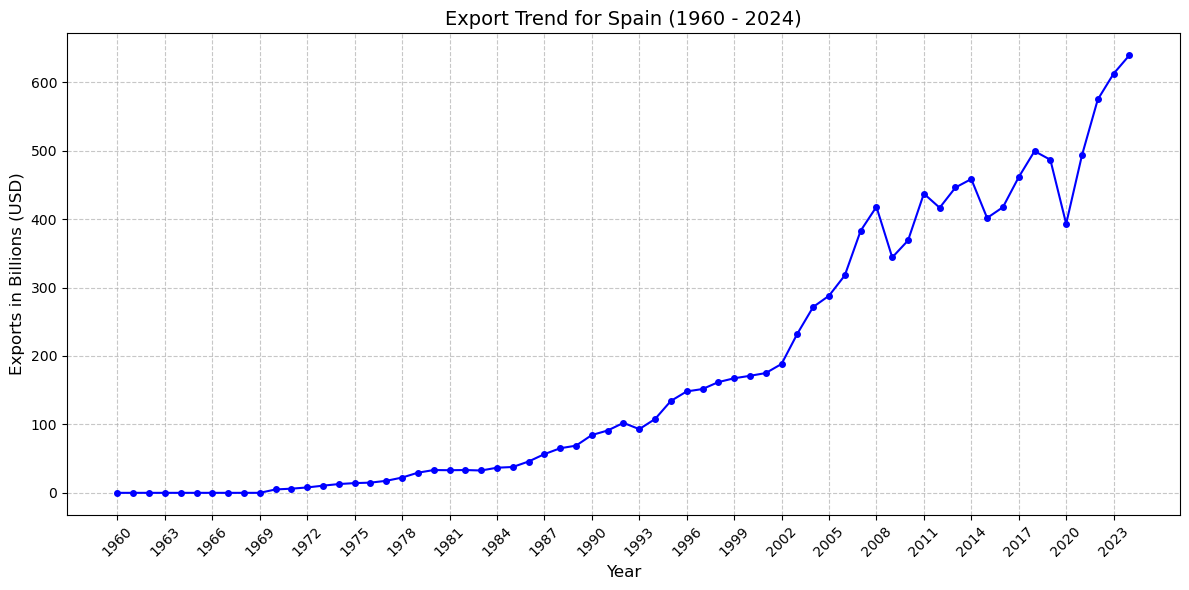

In [115]:
import matplotlib.pyplot as plt
import pandas as pd

# selecting the country we want to visualize
country_to_plot = 'Spain' 

# filtering the dataframe for that country
# use .loc to find the row where 'Country Name' matches
country_data = df[df['Country Name'] == country_to_plot]

# identifying the year columns (everything from the 2nd column onwards)

year_cols = df.columns[1:] 

# extracting the values for those years
exports_in_billions = country_data[year_cols].values.flatten() / 1_000_000_000

# creating the plot
plt.figure(figsize=(12, 6))
plt.plot(year_cols, exports_in_billions, marker='o', linestyle='-', color='b', markersize=4)

# customizing the chart
plt.title(f'Export Trend for {country_to_plot} (1960 - 2024)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Exports in Billions (USD)', fontsize=12)
plt.xticks(year_cols[::3], rotation=45)  # show every 3rd year to avoid crowding
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

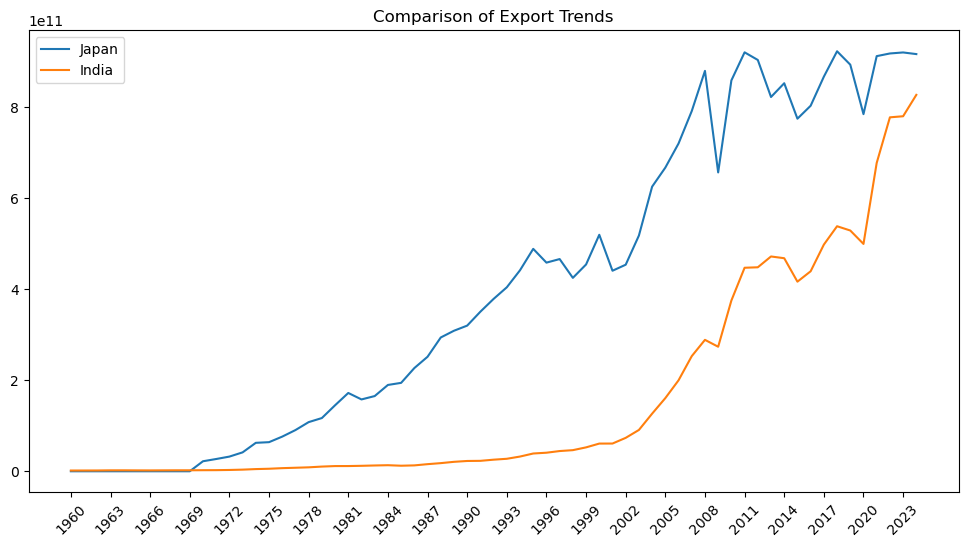

In [118]:
countries = ['Japan', 'India']

plt.figure(figsize=(12, 6))

for country in countries:
    data = df[df['Country Name'] == country]
    values = data[year_cols].values.flatten()
    plt.plot(year_cols, values, label=country)

plt.legend()
plt.title('Comparison of Export Trends')
plt.xticks(year_cols[::3], rotation=45)
plt.show()

In [60]:
# splitting up the dataset into train and test datasets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 44)
# set random set so that the split remains the same each time 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(212, 64)
(212, 1)
(54, 64)
(54, 1)


In [80]:
# performing PCA because we have multiple features 
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[9.95041609e-01 4.64840860e-03 1.47625816e-04 7.96843147e-05
 3.40272979e-05 1.99069007e-05 1.01089640e-05 4.51438896e-06
 3.09612775e-06 2.15177417e-06 1.72031685e-06 1.26069428e-06
 1.10073237e-06 9.29347188e-07 6.48921838e-07 5.21295984e-07
 4.78147901e-07 3.71490577e-07 3.36540805e-07 2.93829648e-07
 2.10560719e-07 1.92552437e-07 1.36751097e-07 1.10602898e-07
 9.93633134e-08 9.37871629e-08 5.80291096e-08 5.56902825e-08
 4.39193748e-08 3.37101446e-08 2.87223784e-08 2.61811351e-08
 1.96795199e-08 1.77010373e-08 1.52590800e-08 1.16406362e-08
 9.07963058e-09 6.87702238e-09 5.98124025e-09 4.72870951e-09
 4.39034105e-09 4.11325209e-09 3.36112571e-09 2.57486338e-09
 2.32793419e-09 1.71710099e-09 1.60053886e-09 1.17687686e-09
 8.16253756e-10 6.35481246e-10 4.29567565e-10 3.45664819e-10
 2.29172478e-10 1.61260846e-10 1.07367316e-10 6.92844823e-11
 5.78796749e-11 4.48295634e-11 2.84664803e-11 1.80233090e-11
 1.61092788e-11 7.80585780e-12 5.17296192e-12 3.92132256e-12]


In [81]:
pca = PCA(n_components = 1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_

print(explained_variance)

[0.99504161]


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44)

model = LinearRegression()
model.fit(x_train, y_train)

print("\nTraining Completed Successfully.")
print("Model Score (R^2):", model.score(x_test, y_test))
print("Model Coefficient :" , model.coef_) # coefficients are the beta values in the linear equation that the model uses to make predictions


Training Completed Successfully.
Model Score (R^2): 0.9963290116025885
Model Coefficient : [[-2.86919498e+00  3.68163121e+01  3.93419776e+01 -2.35668124e+01
  -3.50031550e+01 -1.73063805e+01  1.60609773e+01  3.45903028e+01
  -2.59882933e+01 -1.17212371e+01 -5.06930581e+01  6.67643356e+01
  -8.48186778e+01  6.23909255e+01 -1.80740559e+01 -3.97554590e+01
   3.05550047e+01  3.66418918e+00  1.08456378e+00  8.75174295e+00
  -2.45507622e+00  3.13033548e+00 -4.73772207e+00 -1.25680083e+01
   1.86457094e+01 -2.00150068e+00 -7.18720467e+00  1.08892659e+01
  -8.62793703e+00  2.43301769e-01  4.99940111e-01  2.67175778e+00
  -2.75976264e+00  6.43539826e+00 -4.40462957e+00 -1.55295031e+00
   7.13361313e+00 -1.29367923e+01  1.24346146e+01 -1.45245628e+00
   4.69503629e+00 -6.03972491e+00 -1.78533265e+00 -5.07860212e-01
  -2.86425113e+00 -2.47750662e-02  3.26215062e+00  3.91165649e-01
  -1.31501360e+00 -1.44546800e+00  2.41967861e+00  1.20577833e+00
  -5.13325713e+00  3.22446089e+00 -7.78588405e-01 

In [84]:
# predicting the values and storing it in a variable names 'y_pred'
y_pred = model.predict(x_test)
print(y_pred) 

[[-7.93232403e+11]
 [ 3.24614177e+11]
 [ 1.36737975e+10]
 [ 6.85747095e+11]
 [ 3.62851726e+10]
 [ 2.99240547e+10]
 [ 4.24008010e+09]
 [ 2.11135259e+09]
 [ 2.15930693e+10]
 [ 6.50694178e+11]
 [ 9.69593011e+09]
 [ 3.38574999e+09]
 [ 2.15328670e+10]
 [ 8.57608476e+12]
 [ 3.68244315e+09]
 [ 3.11682014e+09]
 [ 3.11682014e+09]
 [ 3.14582165e+09]
 [ 3.12119723e+09]
 [ 2.09024526e+10]
 [ 3.11682014e+09]
 [ 5.37832715e+12]
 [-4.68057316e+09]
 [ 3.28292473e+10]
 [ 1.72966793e+12]
 [ 8.69637455e+09]
 [ 1.92689953e+09]
 [ 4.04083133e+10]
 [ 1.28859111e+12]
 [ 9.12773191e+09]
 [ 2.54408825e+11]
 [ 3.50637800e+09]
 [ 3.24666699e+09]
 [ 7.38816962e+11]
 [ 3.11682014e+09]
 [ 1.14802255e+10]
 [ 3.52124978e+10]
 [ 3.11682014e+09]
 [ 2.35637388e+11]
 [ 3.11682014e+09]
 [ 7.48544525e+10]
 [ 7.05863663e+10]
 [ 7.45473612e+12]
 [ 2.68998077e+10]
 [ 1.28089830e+13]
 [ 8.19666105e+09]
 [ 9.11163912e+11]
 [ 1.67893462e+11]
 [ 1.42125361e+10]
 [ 3.11682014e+09]
 [ 1.66128217e+10]
 [ 1.74553381e+11]
 [ 2.2924938

In [85]:
# printing the values of y_test for comparision between real and predicted y
y_test 

,2024
7,0.000000e+00
223,3.278752e+11
85,1.035184e+10
154,6.813487e+11
48,3.674023e+10
43,3.459709e+10
87,2.628202e+08
51,0.000000e+00
114,1.411749e+10
35,7.279205e+11


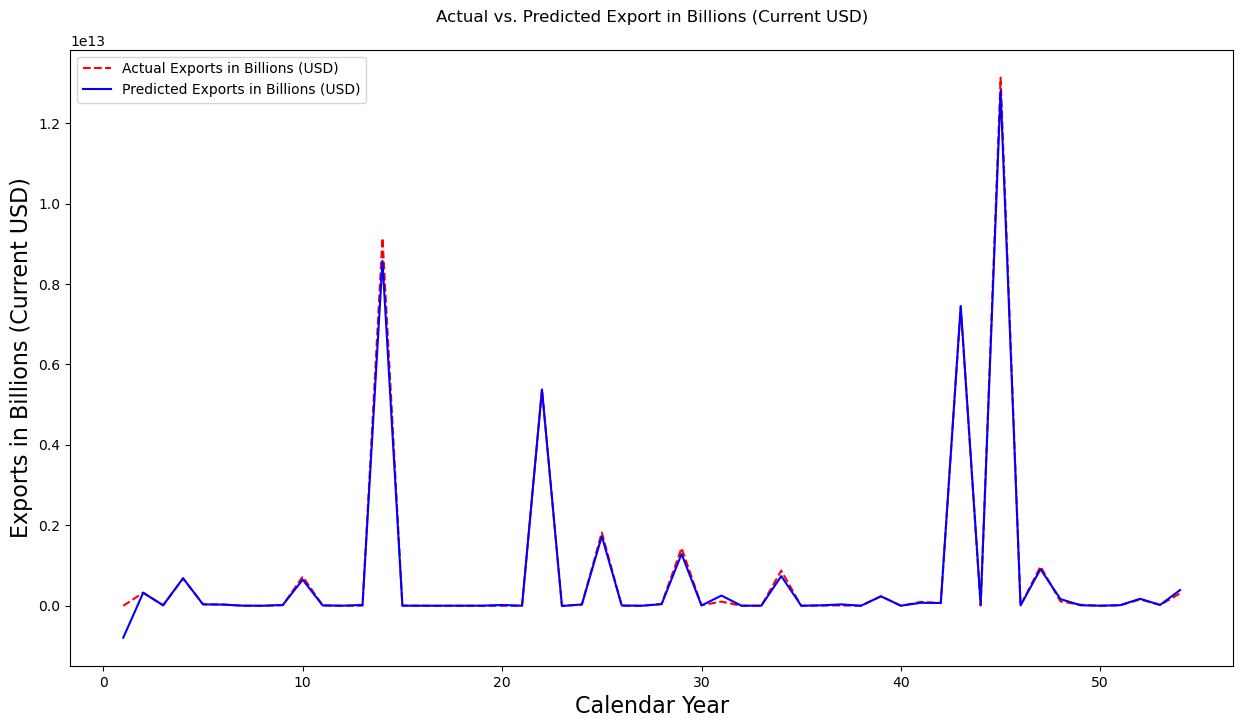

In [97]:
plt.figure(figsize=(15, 8))
index = np.arange(1, len(y_test) + 1)
plt.plot(index, y_test, 'r--', label='Actual Exports in Billions (USD)')
plt.plot(index, y_pred, 'b-', label='Predicted Exports in Billions (USD)')
plt.title('Actual vs. Predicted Export in Billions (Current USD)', pad=20)
plt.xlabel('Calendar Year', fontsize=16)
plt.ylabel('Exports in Billions (Current USD)', fontsize=16)
plt.legend()
plt.show()

In [99]:
# calculating the mean squared error
mse = np.mean((y_pred - y_test)**2)
print(mse)

2.1330828513163702e+22


In [100]:
# calculating the root mean squared error
rmse = np.sqrt(mse)
print(rmse)

146050773750.6505


In [101]:
# calculating the r2 score 
from sklearn.metrics import r2_score 
r2 = r2_score(y_test , y_pred)
print(r2) # if r2 > 0.90, it is a good enough estimate 

0.9963290116025885


In [132]:
# predicting the expected export in 2023

import numpy as np

target_country = input("Enter Country Name: ")

# locating the country in your original dataframe
if target_country in df['Country Name'].values:
    # Get the row for that country
    country_data = df[df['Country Name'] == target_country]
    
    input_features = country_data[x.columns]
    
    # predicting 2024
    pred_2024 = model.predict(input_features)[0]
    
    # predicting 2030 (Linear Projection)
    # taking the 2023 value and the 2024 prediction to find the 'slope'
    val_2023 = country_data['2023'].values[0]
    yearly_diff = pred_2024 - val_2023
    pred_2030 = pred_2024 + (yearly_diff * 6)

    pred_2024_billions = pred_2024 / 1_000_000_000
    pred_2030_billions = pred_2030 / 1_000_000_000
    
    print(f"--- Results for {target_country} ---")
    print(f"Predicted 2024: {pred_2024_billions:} Billion USD")
    print(f"Projected 2030: {pred_2030_billions:} Billion USD")
else:
    print(f"Error: '{target_country}' not found. Check spelling/capitalization.")

Enter Country Name:  France


--- Results for France ---
Predicted 2024: [1064.19562771] Billion USD
Projected 2030: [1130.95194906] Billion USD
